# Question 2

## Problem 3

In [1]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt

In [2]:
N = 100
l = L = 1000
S = 217575
vmin = (0.5 + 0.02*S%21)
vmax = (3 + 0.2*S%11)
Ts =  86400

#### Assumptions 
Apply the same configurations as done in the book in example 6.5. Meaning that we use the stochastic recurrence.

In [3]:
def simulate_waypoint():

    x,y = random.randint(0,l+1), random.randint(0,L+1)
    v0 = random.uniform(vmin, vmax)

    m_init = np.array([x,y])
    v_init = v0
    t = 0
    
    M = [m_init]
    V = [v_init]
    T = [t]
    
    while(t < Ts):

        x,y = random.randint(0,l+1), random.randint(0,L+1)
        m = np.array([x,y])

        t = T[-1] + np.linalg.norm(m-M[-1])/V[-1]

        v = random.uniform(vmin, vmax)
        
        M.append(m)
        V.append(v)
        T.append(t)
 
    return np.array(M), np.array(V), np.array(T)

Retrieve all positions, times, and velocities of all users:

In [4]:
start = time.time()
M_users = []
V_users = []
T_users = []
for i in range(N):
    M, V, T = simulate_waypoint()
    M_users.append(M)
    V_users.append(V)
    T_users.append(T)
end = time.time()
print('Our program takes {:.2f} seconds to generate 1 day of data for N={} users.'.format(end-start, N))

Our program takes 1.77 seconds to generate 1 day of data for N=100 users.


In [5]:
len_waypoints = [len(waypoints) for waypoints in M_users]
print('Mean number of waypoints: {}.'.format(np.mean(len_waypoints)))
print('Minimum number of waypoints: {}.'.format(np.min(len_waypoints)))
print('Maximum number of waypoints: {}.'.format(np.max(len_waypoints)))

Mean number of waypoints: 1387.99.
Minimum number of waypoints: 1322.
Maximum number of waypoints: 1437.


Corresponding boxplot:

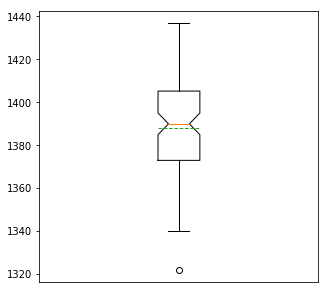

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.boxplot(len_waypoints, notch=True, showmeans=True, meanline=True)
ax.get_xaxis().set_visible(False)
plt.savefig('q2_boxplot')

Course for 1 and 8 users:

In [18]:
def plot_course(num_users, threshold=None):

    for i in range(num_users):
        
        pos_i = M_users[i]
        if threshold is not None:
            num_waypoints = threshold
        else:
            num_waypoints = len(pos_i)
        color = num_waypoints*['white']
        color[0] = 'black'
        x,y = pos_i[:num_waypoints, 0], pos_i[:num_waypoints, 1]
        plt.scatter(x,y, c=color, marker='.', alpha=0.5)
        plt.plot(x, y, linewidth=0.5)
        
    plt.savefig('q2_'+str(num_users)+'_users_'+str(num_waypoints)+'_waypoints')
    plt.show()

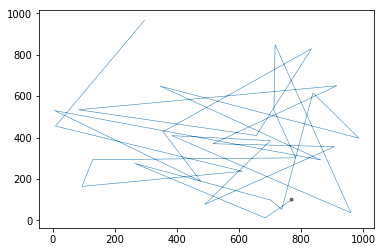

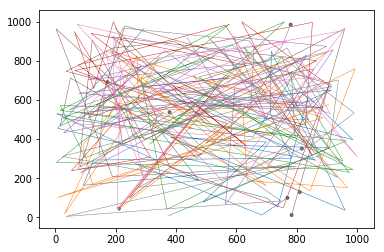

In [19]:
plot_course(1, 30)
plot_course(8, 30)

# Question 3

## Event Average Viewpoint

In [11]:
def plot_event_average_speed():
    fig, axes = plt.subplots(1, 2, figsize=(10,5))

    user_id = 0
    axes[0].hist(V_users[user_id])
    axes[0].set_ylabel('Frequency')
    axes[0].set_xlabel('Speed')
    axes[0].set_title('For one user')

    axes[1].hist(np.concatenate(V_users).ravel().tolist())
    axes[1].set_xlabel('Speed')
    axes[1].set_title('For all users')
    
    plt.tight_layout()
    plt.savefig('q3_event_average_speed')
    plt.show()

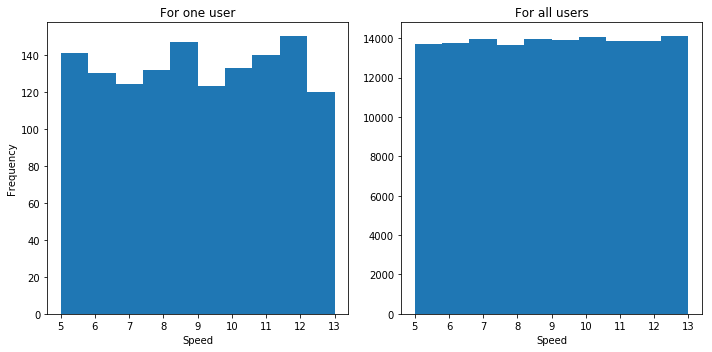

In [12]:
plot_event_average_speed()

In [20]:
def plot_event_average_position():
    fig, axes = plt.subplots(1, 2, figsize=(10,5))

    user_id = 0
    one_user = axes[0].hist2d(M_users[user_id][:,0], M_users[user_id][:,1], bins=(50,50), cmap=plt.cm.Greys)
    plt.colorbar(one_user[3], ax=axes[0])
    axes[0].set_ylabel('Y coordinate')
    axes[0].set_xlabel('X coordinate')
    axes[0].set_title('For one user')
        
    xs = []
    ys = []
    for i in range(N):
        xs.append(M_users[i][:,0])
        ys.append(M_users[i][:,1])
        
    all_users = axes[1].hist2d(np.concatenate(xs).ravel().tolist(), np.concatenate(ys).ravel().tolist(), bins=(50,50), cmap=plt.cm.Greys)
    plt.colorbar(all_users[3], ax=axes[1])
    axes[1].set_xlabel('X coordinate')
    axes[1].set_title('For all users')
    plt.tight_layout()
    plt.savefig('q3_event_average_position')
    plt.show()

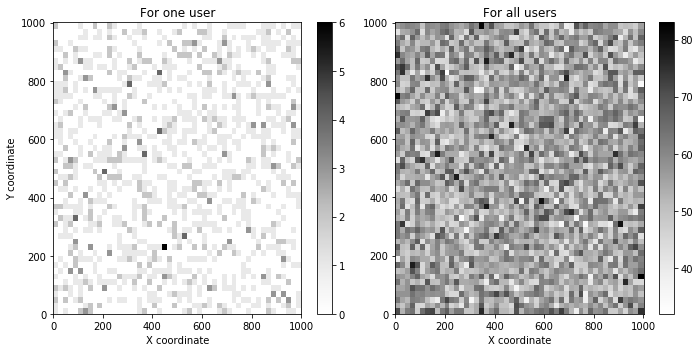

In [21]:
plot_event_average_position()

## Time Average Viewpoint